In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow

from tensorflow import keras
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, Activation
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import LSTM, GRU, Conv1D, Flatten, RepeatVector ,MaxPooling1D,Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

from matplotlib import pyplot
from pickle import load

In [216]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
min_delta_val = 0.0001
lr_cb = ReduceLROnPlateau(monitor = 'val_loss',  
                          factor = 0.5, min_delta = min_delta_val, patience = 10, verbose = 1)
es_cb = EarlyStopping(monitor = 'accuracy', 
                      min_delta=min_delta_val, patience = 20, verbose = 1, restore_best_weights = True,mode='max')

callbacks_model = [lr_cb, es_cb]


In [217]:

X_train = np.load("./saveData/MSFT/X_train.npy", allow_pickle=True)
y_train = np.load("./saveData/MSFT/y_train.npy", allow_pickle=True)
X_test = np.load("./saveData/MSFT/X_test.npy", allow_pickle=True)
y_test = np.load("./saveData/MSFT/y_test.npy", allow_pickle=True)
X_val = np.load("./saveData/MSFT/X_val.npy", allow_pickle=True)
y_val = np.load("./saveData/MSFT/y_val.npy", allow_pickle=True)

# X_train = np.load("./saveData/TSLA/X_train.npy", allow_pickle=True)
# y_train = np.load("./saveData/TSLA/y_train.npy", allow_pickle=True)
# X_test = np.load("./saveData/TSLA/X_test.npy", allow_pickle=True)
# y_test = np.load("./saveData/TSLA/y_test.npy", allow_pickle=True)
# X_val = np.load("./saveData/TSLA/X_val.npy", allow_pickle=True)
# y_val = np.load("./saveData/TSLA/y_val.npy", allow_pickle=True)

# X_train = np.load("./saveData/PAICC/X_train.npy", allow_pickle=True)
# y_train = np.load("./saveData/PAICC/y_train.npy", allow_pickle=True)
# X_test = np.load("./saveData/PAICC/X_test.npy", allow_pickle=True)
# y_test = np.load("./saveData/PAICC/y_test.npy", allow_pickle=True)
# X_val = np.load("./saveData/PAICC/X_val.npy", allow_pickle=True)
# y_val = np.load("./saveData/PAICC/y_val.npy", allow_pickle=True)

# X_train = np.load("./saveData/IBM/X_train.npy", allow_pickle=True)
# y_train = np.load("./saveData/IBM/y_train.npy", allow_pickle=True)
# X_test = np.load("./saveData/IBM/X_test.npy", allow_pickle=True)
# y_test = np.load("./saveData/IBM/y_test.npy", allow_pickle=True)
# X_val = np.load("./saveData/IBM/X_val.npy", allow_pickle=True)
# y_val = np.load("./saveData/IBM/y_val.npy", allow_pickle=True)

# X_train = np.load("./saveData/S&P500/X_train.npy", allow_pickle=True)
# y_train = np.load("./saveData/S&P500/y_train.npy", allow_pickle=True)
# X_test = np.load("./saveData/S&P500/X_test.npy", allow_pickle=True)
# y_test = np.load("./saveData/S&P500/y_test.npy", allow_pickle=True)
# X_val = np.load("./saveData/S&P500/X_val.npy", allow_pickle=True)
# y_val = np.load("./saveData/S&P500/y_val.npy", allow_pickle=True)

# yc_train = np.load("./saveData/yc_train.npy", allow_pickle=True)
# yc_test = np.load("./saveData/yc_test.npy", allow_pickle=True)


# X_train = np.load("./saveData/SSE/X_train.npy", allow_pickle=True)
# y_train = np.load("./saveData/SSE/y_train.npy", allow_pickle=True)
# X_test = np.load("./saveData/SSE/X_test.npy", allow_pickle=True)
# y_test = np.load("./saveData/SSE/y_test.npy", allow_pickle=True)
# X_val = np.load("./saveData/SSE/X_val.npy", allow_pickle=True)
# y_val = np.load("./saveData/SSE/y_val.npy", allow_pickle=True)

#Parameters
LR = 0.001
BATCH_SIZE = 60
N_EPOCH = 1000
dropout = 0.2
input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
#做3分类
output_dim = y_train.shape[1]

#output_dim = 3

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.CategoricalAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]


def basic_cnn_lstm(input_dim, feature_size):
    
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2,
                     input_shape=(input_dim,feature_size)                    
                    ))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(RepeatVector(30))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(dropout))
#     model.add(LSTM(units=64, return_sequences=True ,
#                    kernel_regularizer=(regularizers.l2(0.01))))
#     model.add(Dropout(dropout))
    model.add(LSTM(units=64))
    model.add(Dropout(dropout))
#     model.add(LSTM(64))
#     model.add(Dropout(dropout))
    model.add(Dense(32))
    model.add(Dense(output_dim, activation='softmax'))
    #model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr = LR),metrics=METRICS)
    model.summary()
    history = model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_val, y_val),
                         verbose=1, shuffle=False, callbacks=callbacks_model)
    #, callbacks=callbacks_model
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='validation')
    pyplot.legend()
    pyplot.show()
    return model, history




# def basic_lstm(input_dim, feature_size):
#     print("model dim: ", input_dim, output_dim)
#     model = Sequential()
#     model.add(LSTM(256, return_sequences=True, input_shape=(input_dim,feature_size), batch_size=None))
#     model.add(Dropout(dropout))
#     model.add(LSTM(128, return_sequences=True))
#     model.add(Dropout(dropout))
#     model.add(LSTM(64))
#     model.add(Dropout(dropout))
#     model.add(Dense(output_dim, activation='softmax'))
#     model.add(Activation('softmax'))
    
#     model.compile(loss='categorical_crossentropy', optimizer=Adam(lr = LR),metrics=METRICS)
# #     model = Sequential()
# #     model.add(Bidirectional(LSTM(units= 128), input_shape=(input_dim, feature_size)))
# #     model.add(Dense(64))
# #     model.add(Dense(units=output_dim,activation='softmax'))
# #     model.compile(optimizer=Adam(lr = LR), loss='mse')
#     history = model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_val, y_val),
#                         verbose=1, shuffle=False)

#     pyplot.plot(history.history['loss'], label='train')
#     pyplot.plot(history.history['val_loss'], label='validation')
#     pyplot.legend()
#     pyplot.show()
#     return model,history





In [218]:
X_train.shape

(3850, 30, 16)

In [219]:
y_train.shape

(3850, 3)

In [220]:
X_val.shape

(372, 30, 16)

In [221]:
y_val.shape

(372, 3)

In [222]:
y_train

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 29, 128)           4224      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 14, 128)           0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1792)              0         
_________________________________________________________________
repeat_vector_7 (RepeatVecto (None, 30, 1792)          0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 30, 100)           757200    
_________________________________________________________________
dropout_18 (Dropout)         (None, 30, 100)           0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 64)               

65/65 [==============================] - 15s 224ms/step - loss: 1.0911 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 7700.0000 - fn: 3850.0000 - accuracy: 0.3956 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5412 - prc: 0.3546 - val_loss: 1.1168 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 744.0000 - val_fn: 372.0000 - val_accuracy: 0.2984 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4986 - val_prc: 0.3205
Epoch 16/1000
65/65 [==============================] - 15s 234ms/step - loss: 1.0885 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 7700.0000 - fn: 3850.0000 - accuracy: 0.3979 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5552 - prc: 0.3740 - val_loss: 1.1169 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 744.0000 - val_fn: 372.0000 - val_accuracy: 0.3065 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4973 - val_prc: 0.3218
Epoch 17/1000
65/65 [==============================] - 15s 238ms/step - loss: 1.0859 - tp: 3.0000 - fp: 1.

65/65 [==============================] - 15s 236ms/step - loss: 0.9590 - tp: 919.0000 - fp: 480.0000 - tn: 7220.0000 - fn: 2931.0000 - accuracy: 0.5125 - precision: 0.6569 - recall: 0.2387 - auc: 0.7135 - prc: 0.5628 - val_loss: 1.5319 - val_tp: 97.0000 - val_fp: 175.0000 - val_tn: 569.0000 - val_fn: 275.0000 - val_accuracy: 0.3441 - val_precision: 0.3566 - val_recall: 0.2608 - val_auc: 0.5190 - val_prc: 0.3594
Epoch 34/1000
65/65 [==============================] - 16s 243ms/step - loss: 0.9540 - tp: 1011.0000 - fp: 571.0000 - tn: 7129.0000 - fn: 2839.0000 - accuracy: 0.5145 - precision: 0.6391 - recall: 0.2626 - auc: 0.7172 - prc: 0.5659 - val_loss: 1.5773 - val_tp: 96.0000 - val_fp: 181.0000 - val_tn: 563.0000 - val_fn: 276.0000 - val_accuracy: 0.3468 - val_precision: 0.3466 - val_recall: 0.2581 - val_auc: 0.5268 - val_prc: 0.3608
Epoch 35/1000
65/65 [==============================] - 16s 248ms/step - loss: 0.9406 - tp: 1096.0000 - fp: 583.0000 - tn: 7117.0000 - fn: 2754.0000 - accur

Epoch 51/1000
65/65 [==============================] - 19s 289ms/step - loss: 0.6561 - tp: 2292.0000 - fp: 639.0000 - tn: 7061.0000 - fn: 1558.0000 - accuracy: 0.7026 - precision: 0.7820 - recall: 0.5953 - auc: 0.8798 - prc: 0.8070 - val_loss: 2.9028 - val_tp: 117.0000 - val_fp: 236.0000 - val_tn: 508.0000 - val_fn: 255.0000 - val_accuracy: 0.3414 - val_precision: 0.3314 - val_recall: 0.3145 - val_auc: 0.5087 - val_prc: 0.3443
Epoch 52/1000
65/65 [==============================] - 17s 258ms/step - loss: 0.6465 - tp: 2293.0000 - fp: 668.0000 - tn: 7032.0000 - fn: 1557.0000 - accuracy: 0.7052 - precision: 0.7744 - recall: 0.5956 - auc: 0.8823 - prc: 0.8106 - val_loss: 2.9664 - val_tp: 120.0000 - val_fp: 236.0000 - val_tn: 508.0000 - val_fn: 252.0000 - val_accuracy: 0.3414 - val_precision: 0.3371 - val_recall: 0.3226 - val_auc: 0.5064 - val_prc: 0.3434
Epoch 53/1000
65/65 [==============================] - 16s 250ms/step - loss: 0.6343 - tp: 2345.0000 - fp: 654.0000 - tn: 7046.0000 - fn: 

Epoch 69/1000
65/65 [==============================] - 16s 253ms/step - loss: 0.5389 - tp: 2632.0000 - fp: 576.0000 - tn: 7124.0000 - fn: 1218.0000 - accuracy: 0.7587 - precision: 0.8204 - recall: 0.6836 - auc: 0.9199 - prc: 0.8694 - val_loss: 3.4966 - val_tp: 121.0000 - val_fp: 241.0000 - val_tn: 503.0000 - val_fn: 251.0000 - val_accuracy: 0.3360 - val_precision: 0.3343 - val_recall: 0.3253 - val_auc: 0.5084 - val_prc: 0.3467
Epoch 70/1000
65/65 [==============================] - 16s 248ms/step - loss: 0.5423 - tp: 2617.0000 - fp: 577.0000 - tn: 7123.0000 - fn: 1233.0000 - accuracy: 0.7584 - precision: 0.8193 - recall: 0.6797 - auc: 0.9191 - prc: 0.8686 - val_loss: 3.4990 - val_tp: 125.0000 - val_fp: 237.0000 - val_tn: 507.0000 - val_fn: 247.0000 - val_accuracy: 0.3441 - val_precision: 0.3453 - val_recall: 0.3360 - val_auc: 0.5084 - val_prc: 0.3461
Epoch 71/1000
65/65 [==============================] - 16s 245ms/step - loss: 0.5390 - tp: 2636.0000 - fp: 583.0000 - tn: 7117.0000 - fn: 

65/65 [==============================] - ETA: 0s - loss: 0.5135 - tp: 2712.0000 - fp: 558.0000 - tn: 7142.0000 - fn: 1138.0000 - accuracy: 0.7740 - precision: 0.8294 - recall: 0.7044 - auc: 0.9278 - prc: 0.8818
Epoch 00087: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
65/65 [==============================] - 18s 277ms/step - loss: 0.5135 - tp: 2712.0000 - fp: 558.0000 - tn: 7142.0000 - fn: 1138.0000 - accuracy: 0.7740 - precision: 0.8294 - recall: 0.7044 - auc: 0.9278 - prc: 0.8818 - val_loss: 3.6705 - val_tp: 122.0000 - val_fp: 243.0000 - val_tn: 501.0000 - val_fn: 250.0000 - val_accuracy: 0.3360 - val_precision: 0.3342 - val_recall: 0.3280 - val_auc: 0.5133 - val_prc: 0.3472
Epoch 88/1000
65/65 [==============================] - 16s 254ms/step - loss: 0.5140 - tp: 2713.0000 - fp: 549.0000 - tn: 7151.0000 - fn: 1137.0000 - accuracy: 0.7740 - precision: 0.8317 - recall: 0.7047 - auc: 0.9278 - prc: 0.8824 - val_loss: 3.6736 - val_tp: 122.0000 - val_fp: 244.0000 - v

Epoch 105/1000
65/65 [==============================] - 18s 270ms/step - loss: 0.5094 - tp: 2724.0000 - fp: 562.0000 - tn: 7138.0000 - fn: 1126.0000 - accuracy: 0.7745 - precision: 0.8290 - recall: 0.7075 - auc: 0.9286 - prc: 0.8829 - val_loss: 3.7181 - val_tp: 119.0000 - val_fp: 247.0000 - val_tn: 497.0000 - val_fn: 253.0000 - val_accuracy: 0.3306 - val_precision: 0.3251 - val_recall: 0.3199 - val_auc: 0.5143 - val_prc: 0.3492
Epoch 106/1000
65/65 [==============================] - 17s 254ms/step - loss: 0.5090 - tp: 2718.0000 - fp: 571.0000 - tn: 7129.0000 - fn: 1132.0000 - accuracy: 0.7732 - precision: 0.8264 - recall: 0.7060 - auc: 0.9288 - prc: 0.8835 - val_loss: 3.7206 - val_tp: 120.0000 - val_fp: 246.0000 - val_tn: 498.0000 - val_fn: 252.0000 - val_accuracy: 0.3333 - val_precision: 0.3279 - val_recall: 0.3226 - val_auc: 0.5130 - val_prc: 0.3471
Epoch 107/1000
65/65 [==============================] - ETA: 0s - loss: 0.5026 - tp: 2755.0000 - fp: 520.0000 - tn: 7180.0000 - fn: 1095

Epoch 123/1000
65/65 [==============================] - 16s 247ms/step - loss: 0.5081 - tp: 2717.0000 - fp: 572.0000 - tn: 7128.0000 - fn: 1133.0000 - accuracy: 0.7706 - precision: 0.8261 - recall: 0.7057 - auc: 0.9289 - prc: 0.8833 - val_loss: 3.7270 - val_tp: 121.0000 - val_fp: 244.0000 - val_tn: 500.0000 - val_fn: 251.0000 - val_accuracy: 0.3360 - val_precision: 0.3315 - val_recall: 0.3253 - val_auc: 0.5153 - val_prc: 0.3493
Epoch 124/1000
65/65 [==============================] - 15s 226ms/step - loss: 0.5124 - tp: 2739.0000 - fp: 544.0000 - tn: 7156.0000 - fn: 1111.0000 - accuracy: 0.7774 - precision: 0.8343 - recall: 0.7114 - auc: 0.9287 - prc: 0.8840 - val_loss: 3.7269 - val_tp: 121.0000 - val_fp: 244.0000 - val_tn: 500.0000 - val_fn: 251.0000 - val_accuracy: 0.3360 - val_precision: 0.3315 - val_recall: 0.3253 - val_auc: 0.5153 - val_prc: 0.3493
Epoch 125/1000
65/65 [==============================] - 15s 237ms/step - loss: 0.5057 - tp: 2726.0000 - fp: 529.0000 - tn: 7171.0000 - f

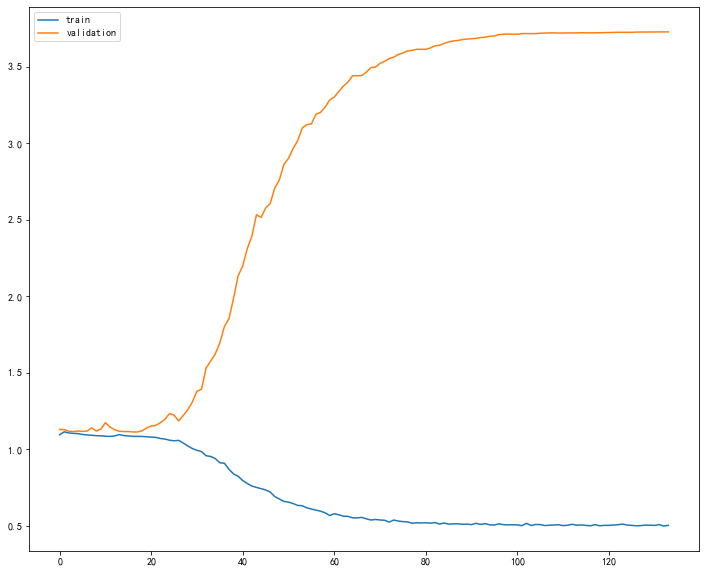

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 29, 128)           4224      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 14, 128)           0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1792)              0         
_________________________________________________________________
repeat_vector_7 (RepeatVecto (None, 30, 1792)          0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 30, 100)           757200    
_________________________________________________________________
dropout_18 (Dropout)         (None, 30, 100)           0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 64)               

In [223]:
model,history= basic_cnn_lstm(input_dim, feature_size)
model.save('./saveModel/CNN_LSTM_3to1.h5')
print(model.summary())


In [224]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'prc', 'val_loss', 'val_tp', 'val_fp', 'val_tn', 'val_fn', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_prc', 'lr'])

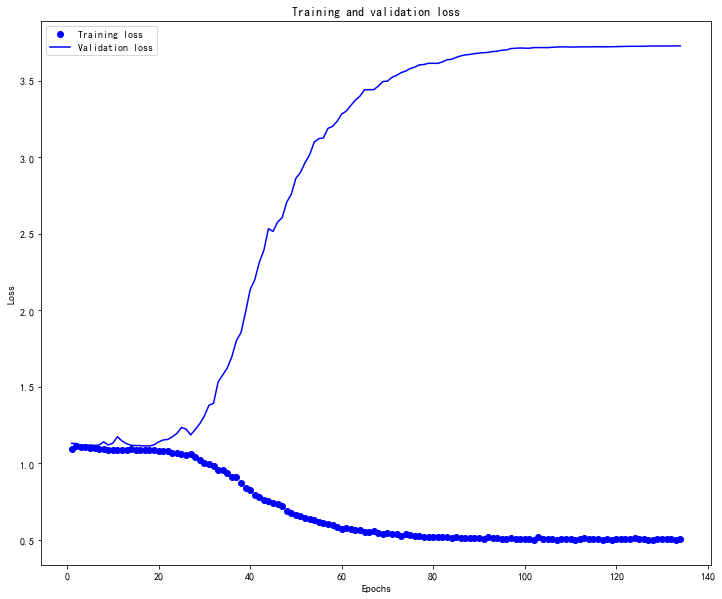

In [225]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# “bo”代表 "蓝点"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b代表“蓝色实线”
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

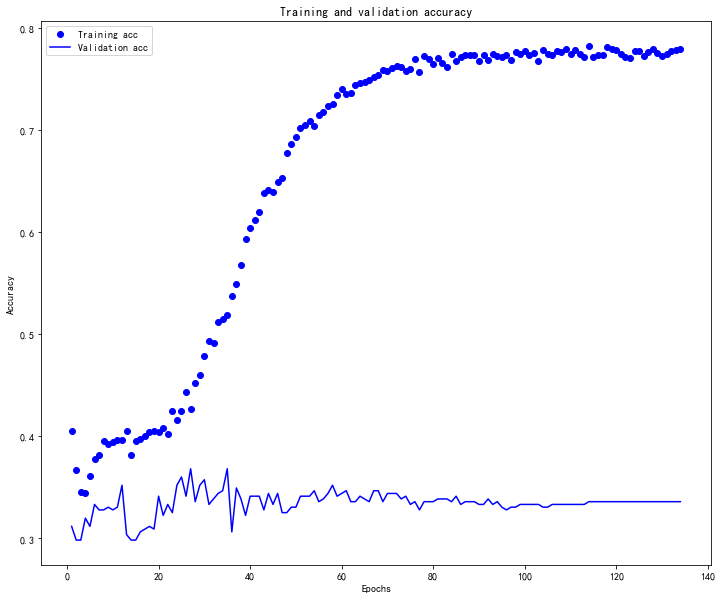

In [226]:
plt.clf()   # 清除数字
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [227]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [228]:
def plot_metrics(history):
    metrics = ['loss', 'prc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])

        plt.legend()

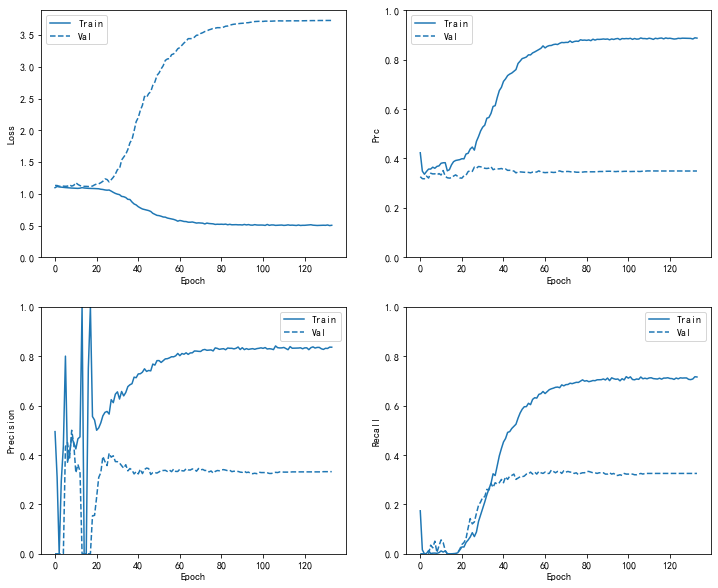

In [229]:
plot_metrics(history)

### Note: That the validation curve generally performs better than the training curve. This is mainly caused by the fact that the dropout layer is not active when evaluating the model.

### Evaluate metrics 
### You can use a confusion matrix to summarize the actual vs. predicted labels where the X axis is the predicted label  and the Y axis is the actual label.

In [230]:
train_predictions_baseline = model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(X_test, batch_size=BATCH_SIZE)

In [231]:
baseline_results = model.evaluate(X_test, y_test,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
print()

#plot_cm(y_test, test_predictions_baseline)

loss :  3.2390646934509277
tp :  248.0
fp :  462.0
tn :  1028.0
fn :  497.0
accuracy :  0.34496644139289856
precision :  0.3492957651615143
recall :  0.33288589119911194
auc :  0.5014094114303589
prc :  0.3368159532546997



# 绘制ROC曲线

In [232]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.preprocessing import label_binarize


In [233]:
#同时也是分类得分y_score
#概率矩阵P和标签矩阵L分别对应代码中的y_score和y_one_hot：
yhat = model.predict(X_test, verbose=0)


In [234]:
from sklearn.preprocessing import label_binarize


In [235]:
y_test

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]])

In [236]:
yhat

array([[5.8744889e-05, 7.7239955e-03, 9.9221730e-01],
       [1.9965320e-05, 3.3446541e-04, 9.9964559e-01],
       [1.8918263e-02, 8.1754732e-01, 1.6353436e-01],
       ...,
       [7.0967956e-04, 6.1227232e-02, 9.3806314e-01],
       [7.5042562e-04, 4.3040566e-02, 9.5620894e-01],
       [2.5541638e-03, 8.0013156e-01, 1.9731426e-01]], dtype=float32)

调用函数auc： 0.5016873113823702
手动计算auc： 0.5016873113823702


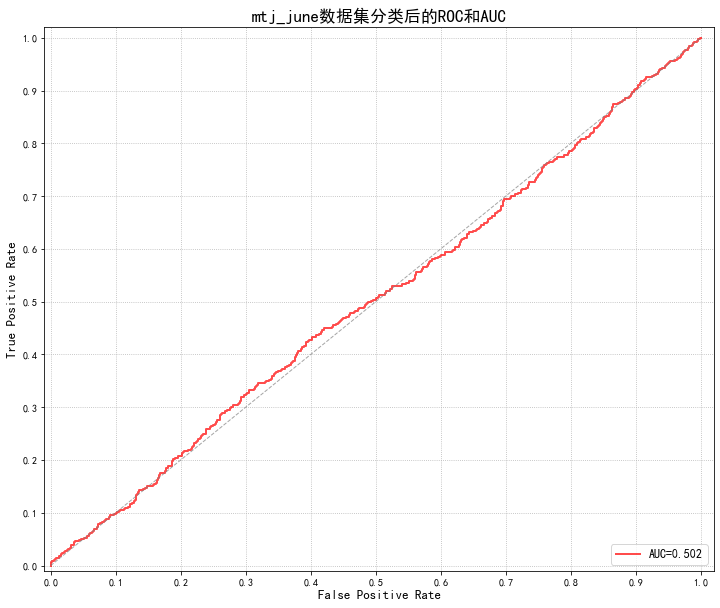

In [237]:
# 计算属于各个类别的概率，返回值的shape = [n_samples, n_classes]
y_score = model.predict(X_test)
# 1、调用函数计算micro类型的AUC
print('调用函数auc：', metrics.roc_auc_score(y_test, y_score, average='micro'))
# 2、手动计算micro类型的AUC
#首先将矩阵y_one_hot和y_score展开，然后计算假正例率FPR和真正例率TPR
fpr, tpr, thresholds = metrics.roc_curve(y_test.ravel(),y_score.ravel())
auc = metrics.auc(fpr, tpr)
print('手动计算auc：', auc)
#绘图
mpl.rcParams['font.sans-serif'] = u'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
#FPR就是横坐标,TPR就是纵坐标
plt.plot(fpr, tpr, c = 'r', lw = 2, alpha = 0.7, label = u'AUC=%.3f' % auc)
plt.plot((0, 1), (0, 1), c = '#808080', lw = 1, ls = '--', alpha = 0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'mtj_june数据集分类后的ROC和AUC', fontsize=17)
plt.show()

<ipython-input-238-787ee4c874f3>:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


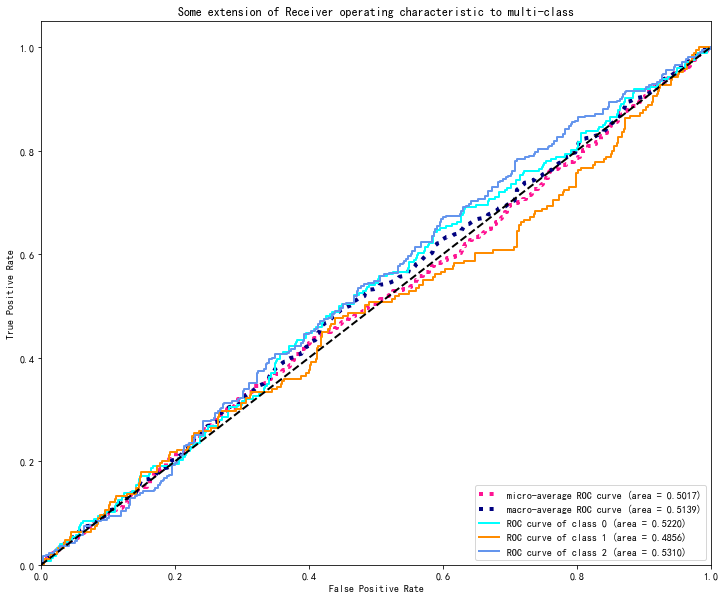

In [238]:
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [239]:
import tensorflow as tf
def to_0_1(y):
    res = []
    for i in range(y.shape[0]):
        if(y[i][0] > y[i][1] and y[i][0] > y[i][2]):
            res.append(-1) #跌
        if(y[i][1] > y[i][0] and y[i][1] > y[i][2]):
            res.append(0) #平
        if(y[i][2] > y[i][0] and y[i][2] > y[i][1]):
            res.append(1) #涨
    return np.array(res)

def result_to_0_1(y):
        if(tf.is_tensor(y)):
            y = y.numpy()
            for i in range(y.shape[0]):
                max_index = 0
                if(y[i][max_index] < y[i][1]):
                    max_index = 1
                if(y[i][max_index] < y[i][2]):
                    max_index = 2
                list_temp = [0,1,2]
                list_temp.pop(max_index)
                y[i][max_index] = 1
                y[i][list_temp[0]] = 0
                y[i][list_temp[1]] = 0
        else:
            for i in range(y.shape[0]):
                max_index = 0
                if(y[i][max_index] < y[i][1]):
                    max_index = 1
                if(y[i][max_index] < y[i][2]):
                    max_index = 2
                list_temp = [0,1,2]
                list_temp.pop(max_index)
                y[i][max_index] = 1
                y[i][list_temp[0]] = 0
                y[i][list_temp[1]] = 0
        return y
    

In [240]:
y = result_to_0_1(yhat)

In [241]:
y_pre = to_0_1(yhat)
y_true = to_0_1(y_test)

In [242]:
cm = confusion_matrix(y_true, y_pre)
conf_matrix = pd.DataFrame(cm, index=['跌','平','涨'], columns=['跌','平','涨'])


In [243]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, average_precision_score,precision_score,f1_score,recall_score

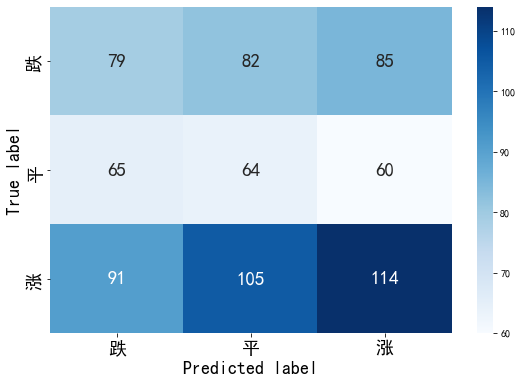

In [244]:
from sklearn import metrics as ms
# plot size setting
fig, ax = plt.subplots(figsize = (9,6))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 19},fmt='.20g', cmap="Blues")
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('confusion.pdf', bbox_inches='tight')
plt.show()

In [245]:
print('------Weighted------')
print('Weighted precision', precision_score(y_true, y_pre, average='weighted'))
print('Weighted recall', recall_score(y_true, y_pre, average='weighted'))
print('Weighted f1-score', f1_score(y_true, y_pre, average='weighted'))
print('------Macro------')
print('Macro precision', precision_score(y_true, y_pre, average='macro'))
print('Macro recall', recall_score(y_true, y_pre, average='macro'))
print('Macro f1-score', f1_score(y_true, y_pre, average='macro'))
print('------Micro------')
print('Micro precision', precision_score(y_true, y_pre, average='micro'))
print('Micro recall', recall_score(y_true, y_pre, average='micro'))
print('Micro f1-score', f1_score(y_true, y_pre, average='micro'))

------Weighted------
Weighted precision 0.35884158905780256
Weighted recall 0.34496644295302015
Weighted f1-score 0.34900187540236605
------Macro------
Macro precision 0.34376824420055746
Macro recall 0.34250149516344114
Macro f1-score 0.34003146902971154
------Micro------
Micro precision 0.34496644295302015
Micro recall 0.34496644295302015
Micro f1-score 0.34496644295302015


In [246]:
tp = pd.DataFrame()
tp['CS'] = yhat.tolist()

In [247]:
tp.describe()

,CS
count,745
unique,3
top,"[0.0, 0.0, 1.0]"
freq,259


In [248]:
yhat.shape

(745, 3)